# Accessing and Subsetting Variables

## Objectives

Introduce methods for **accessing** and **subsetting** the variables stored in ECCO `Datasets` and `DataArrays`.


## Introduction

There are two methods for accessing variables stored in `DataArray` and `Dataset` objects, the "dot" method and the "dictionary" method.  The syntax of these methods is as follows:

1. The "dot" method: e.g. ,`X.Y`
2. The "dictionary" method: e.g., `Y['Y']`

Both methods work identically to access *Dimensions*, *Coordinates*, and *Data variables*. Accessing *Attribute* variables requires a slightly different approach as we will see.

For this tutorial make sure that you have the 2010 monthly granules of the SSH and OBP datasets downloaded, with ShortNames:

- **ECCO_L4_SSH_LLC0090GRID_MONTHLY_V4R4**
- **ECCO_L4_OBP_LLC0090GRID_MONTHLY_V4R4**

You will also need the [grid file](https://ecco-v4-python-tutorial.readthedocs.io/ECCO_v4_Loading_the_ECCOv4_native_model_grid_parameters.html) downloaded if you don't have it already.


## Accessing fields inside `Dataset` and `DataArray` objects

First create a `Dataset`:

In [1]:
import numpy as np
import xarray as xr
import sys
import matplotlib.pyplot as plt
%matplotlib inline
import json
import glob


# indicate whether you are working in a cloud instance (True if yes, False otherwise)
incloud_access = False

import warnings
warnings.filterwarnings('ignore')

In [2]:
## Import the ecco_v4_py library into Python
## =========================================
##    If ecco_v4_py is not installed in your local Python library, 
##    tell Python where to find it.  The example below adds
##    ecco_v4_py to the user's path if it is stored in the folder
##    ECCOv4-py under the user's home directory

from os.path import join,expanduser
user_home_dir = expanduser('~')

sys.path.append(join(user_home_dir,'ECCOv4-py'))

import ecco_v4_py as ecco

In [3]:
## Set top-level file directory for the ECCO NetCDF files
## =================================================================

## currently set to ~/Downloads/ECCO_V4r4_PODAAC, 
## the default if ecco_podaac_download was used to download dataset granules
ECCO_dir = join(user_home_dir,'Downloads','ECCO_V4r4_PODAAC')

In [4]:
## open ECCO datasets needed for the tutorial

ShortNames_list = ["ECCO_L4_GEOMETRY_LLC0090GRID_V4R4",\
                   "ECCO_L4_SSH_LLC0090GRID_MONTHLY_V4R4",\
                   "ECCO_L4_OBP_LLC0090GRID_MONTHLY_V4R4"]
if incloud_access == True:
    from ecco_s3_retrieve import ecco_podaac_s3_get_diskaware
    files_dict = ecco_podaac_s3_get_diskaware(ShortNames=ShortNames_list,\
                                              StartDate='2010-01',EndDate='2010-12',\
                                              max_avail_frac=0.5,\
                                              download_root_dir=ECCO_dir)
    ecco_grid = xr.open_dataset(files_dict[ShortNames_list[0]])
    ds_SSH = xr.open_mfdataset(files_dict[ShortNames_list[1]],\
                                     compat='override',data_vars='minimal',coords='minimal')
    ds_OBP = xr.open_mfdataset(files_dict[ShortNames_list[2]],\
                                      compat='override',data_vars='minimal',coords='minimal')
else:
    ecco_grid = xr.open_dataset(glob.glob(join(ECCO_dir,ShortNames_list[0],'*.nc'))[0])
    ds_SSH = xr.open_mfdataset(glob.glob(join(ECCO_dir,ShortNames_list[1],'*2010-*.nc')),\
                                     compat='override',data_vars='minimal',coords='minimal')
    ds_OBP = xr.open_mfdataset(glob.glob(join(ECCO_dir,ShortNames_list[2],'*2010-*.nc')),\
                                     compat='override',data_vars='minimal',coords='minimal')


## Merge the grid and variable datasets to make the ecco_ds
ecco_ds = xr.merge((ecco_grid,ds_SSH,ds_OBP))                                      

In [5]:
ecco_ds.data_vars

Data variables:
    CS        (tile, j, i) float32 421kB ...
    SN        (tile, j, i) float32 421kB ...
    rA        (tile, j, i) float32 421kB ...
    dxG       (tile, j_g, i) float32 421kB ...
    dyG       (tile, j, i_g) float32 421kB ...
    Depth     (tile, j, i) float32 421kB ...
    rAz       (tile, j_g, i_g) float32 421kB ...
    dxC       (tile, j, i_g) float32 421kB ...
    dyC       (tile, j_g, i) float32 421kB ...
    rAw       (tile, j, i_g) float32 421kB ...
    rAs       (tile, j_g, i) float32 421kB ...
    drC       (k_p1) float32 204B ...
    drF       (k) float32 200B ...
    PHrefC    (k) float32 200B ...
    PHrefF    (k_p1) float32 204B ...
    hFacC     (k, tile, j, i) float32 21MB ...
    hFacW     (k, tile, j, i_g) float32 21MB ...
    hFacS     (k, tile, j_g, i) float32 21MB ...
    maskC     (k, tile, j, i) bool 5MB ...
    maskW     (k, tile, j, i_g) bool 5MB ...
    maskS     (k, tile, j_g, i) bool 5MB ...
    SSH       (time, tile, j, i) float32 5MB dask

In [6]:
ecco_ds.coords

Coordinates:
  * i          (i) int32 360B 0 1 2 3 4 5 6 7 8 9 ... 81 82 83 84 85 86 87 88 89
  * i_g        (i_g) int32 360B 0 1 2 3 4 5 6 7 8 ... 81 82 83 84 85 86 87 88 89
  * j          (j) int32 360B 0 1 2 3 4 5 6 7 8 9 ... 81 82 83 84 85 86 87 88 89
  * j_g        (j_g) int32 360B 0 1 2 3 4 5 6 7 8 ... 81 82 83 84 85 86 87 88 89
  * k          (k) int32 200B 0 1 2 3 4 5 6 7 8 9 ... 41 42 43 44 45 46 47 48 49
  * k_u        (k_u) int32 200B 0 1 2 3 4 5 6 7 8 ... 41 42 43 44 45 46 47 48 49
  * k_l        (k_l) int32 200B 0 1 2 3 4 5 6 7 8 ... 41 42 43 44 45 46 47 48 49
  * k_p1       (k_p1) int32 204B 0 1 2 3 4 5 6 7 8 ... 43 44 45 46 47 48 49 50
  * tile       (tile) int32 52B 0 1 2 3 4 5 6 7 8 9 10 11 12
    XC         (tile, j, i) float32 421kB dask.array<chunksize=(13, 90, 90), meta=np.ndarray>
    YC         (tile, j, i) float32 421kB dask.array<chunksize=(13, 90, 90), meta=np.ndarray>
    XG         (tile, j_g, i_g) float32 421kB dask.array<chunksize=(13, 90, 90), meta=np.nda

### Accessing Data Variables

Now we'll use the two methods to access the ``SSH`` `DataArray`,

In [7]:
## The Dot Method
ssh_A = ecco_ds.SSH

## The Dictionary Method
ssh_B = ecco_ds['SSH']

In [8]:
print (type(ssh_A))
print (type(ssh_B))

<class 'xarray.core.dataarray.DataArray'>
<class 'xarray.core.dataarray.DataArray'>


We access the `numpy` arrays stored in these `DataArrays` with the "dot" method on `values`.

In [9]:
ssh_arr = ssh_A.values
print (type(ssh_arr))

<class 'numpy.ndarray'>


#### The ``numpy`` array storing the data

The shape of the `numpy` array can be found by invoking its `.shape`

In [10]:
ssh_arr.shape

(12, 13, 90, 90)

The order of these four dimensions is consistent with their ordering in the original `DataArray`,
~~~
time, tile, j, i
~~~

In [11]:
ssh_A.dims

('time', 'tile', 'j', 'i')

``ssh_A`` and ``ssh_B`` are new variables but they are not **copies** of the original  ``SSH`` `DataArray` object, they both point to the original `numpy` array.  

We can confirm that ``ssh_A`` and ``ssh_B`` both refer to the same array in memory using the Python `allclose` command (and ignoring nans)

In [12]:
print(np.allclose(ssh_A, ssh_B, equal_nan=True))

True


#### Accessing the numpy array

We have *ssh_arr*, a 4D numpy array (``ndarray``).  Let's take out a single 2D slice of it, the first time record, and the second tile:

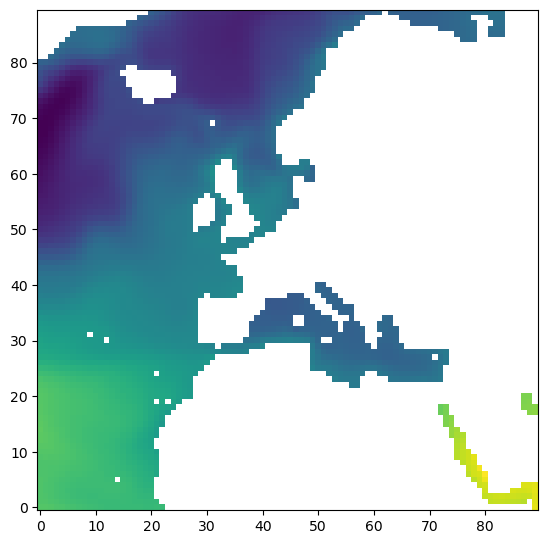

In [13]:
fig=plt.figure(figsize=(8, 6.5))

# plot SSH for time =0, tile = 2 by using ``imshow`` on the ``numpy array``
plt.imshow(ssh_arr[0,2,:,:], origin='lower')

We could accessing the array using the "dot" method on *ecco_ds* to first get *SSH* and then use the "dot" method to access the ``numpy`` array through *values*:

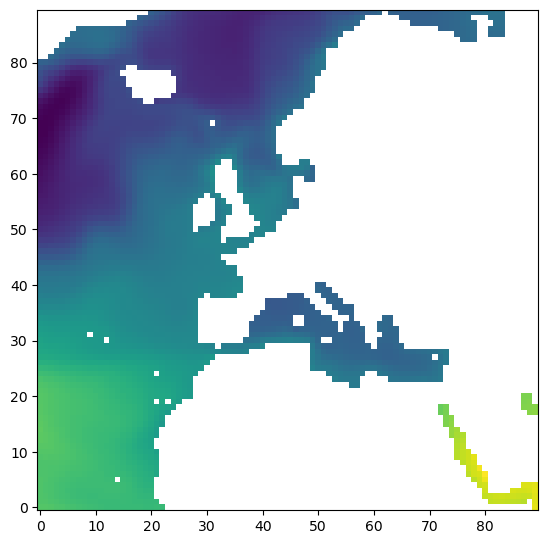

In [14]:
fig=plt.figure(figsize=(8, 6.5))
plt.imshow(ecco_ds.SSH.values[0,2,:,:], origin='lower')

Or could use the "dictionary" method on *ecco_ds* to get *SSH* then the "dot" method to access the ``numpy`` array through *values*:

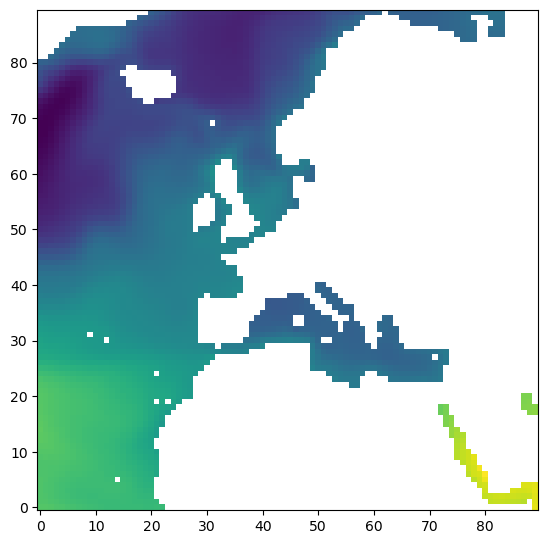

In [15]:
fig=plt.figure(figsize=(8, 6.5))
plt.imshow(ecco_ds['SSH'].values[0,2,:,:], origin='lower')

These are equivalent methods.

### Accessing Coordinates

Accessing Coordinates is exactly the same as accessing *Data variables*.  Use the "dot" or "dictionary" methods

In [16]:
xc = ecco_ds['XC']
time = ecco_ds['time']

print(type(xc))
print(type(time))

<class 'xarray.core.dataarray.DataArray'>
<class 'xarray.core.dataarray.DataArray'>


As *xc* is a ``DataArray``, we can access the values in its ``numpy`` array through ``.values``

In [17]:
xc.values

array([[[-111.60647 , -111.303   , -110.94285 , ...,   64.791115,
           64.80521 ,   64.81917 ],
        [-104.8196  , -103.928444, -102.87706 , ...,   64.36745 ,
           64.41012 ,   64.4524  ],
        [ -98.198784,  -96.788055,  -95.14185 , ...,   63.936497,
           64.008224,   64.0793  ],
        ...,
        [ -37.5     ,  -36.5     ,  -35.5     , ...,   49.5     ,
           50.5     ,   51.5     ],
        [ -37.5     ,  -36.5     ,  -35.5     , ...,   49.5     ,
           50.5     ,   51.5     ],
        [ -37.5     ,  -36.5     ,  -35.5     , ...,   49.5     ,
           50.5     ,   51.5     ]],

       [[ -37.5     ,  -36.5     ,  -35.5     , ...,   49.5     ,
           50.5     ,   51.5     ],
        [ -37.5     ,  -36.5     ,  -35.5     , ...,   49.5     ,
           50.5     ,   51.5     ],
        [ -37.5     ,  -36.5     ,  -35.5     , ...,   49.5     ,
           50.5     ,   51.5     ],
        ...,
        [ -37.5     ,  -36.5     ,  -35.5     , ...,  

The shape of the *xc* is 13 x 90 x 90.  Unlike *SSH* there is no time dimension.

In [18]:
xc.values.shape

(13, 90, 90)

### Accessing Attributes

To access *Attribute* fields you you can use the dot method directly on the ``Dataset`` or ``DataArray`` or the dictionary method on the ``attrs`` field. 

To demonstrate: we access the ``units`` attribute on *OBP* using both methods

In [19]:
ecco_ds.OBP.units

'm'

In [20]:
ecco_ds.OBP.attrs['units']

'm'

## Subsetting variables using the``[]``, ``sel``,  ``isel``, and ``where`` syntaxes

So far, a considerable amount of attention has been placed on the *Coordinates* of `Dataset` and `DataArray` objects.  Why?  Labeled coordinates are certainly not necessary for calculations on the basic numerical arrays that store the ECCO state estimate fields.  The reason so much attention has been placed on coordinates is because the `xarray` offers several very useful methods for selecting (or indexing) subsets of data.

For more details of these *indexing* methods, please see the excellent ``xarray`` documentation:
http://xarray.pydata.org/en/stable/indexing.html


### Subsetting `numpy` arrays using the **[ ]** syntax

Subsetting `numpy` arrays is simple with the standard Python **[ ]** syntax.  

To demonstrate, we'll pull out the ``numpy`` array of *SSH* and then select the first time record and second tile

  > **Note:**  `numpy` array indexing starts with 0*

In [21]:
ssh_arr = ecco_ds.SSH.values
type(ssh_arr)
ssh_arr.shape

(12, 13, 90, 90)

We know the order of the dimensions of SSH is [time, tile, j, i], so :

In [22]:
ssh_time_0_tile_2 = ssh_arr[0,2,:,:]

*ssh_time_0_tile_2* is also a numpy array, but now it is a 2D array:

In [23]:
ssh_time_0_tile_2.shape

(90, 90)

Note that when subsetting only one index along a given dimension, numpy collapses (removes) that dimension by default. If you want to retain these "singleton" dimensions (sometimes useful for broadcasting the array) you can add brackets around the single index:

In [24]:
ssh_time_0_tile_2_3d = ssh_arr[[0],2,:,:]
ssh_time_0_tile_2_3d.shape

(1, 90, 90)

If you are subsetting a single index along multiple dimensions simultaneously, you may need to add extra brackets to retain the earlier dimensions:

In [25]:
ssh_time_0_tile_2_4d = ssh_arr[[[0]],[2],:,:]
ssh_time_0_tile_2_4d.shape

(1, 1, 90, 90)

We know that the *time* coordinate on *ecco_ds* has one dimension, **time**, so we can use the ``[]`` syntax to find the first element of that array as well:

In [26]:
print(ecco_ds.time.dims)

# the first time record is 
print(ecco_ds.time.values[0])

('time',)
2010-01-16T12:00:00.000000000


which confirms that the first time record corresponds with Jan 2010

Now that we have a 2D array in *ssh_time_0_tile_2*, let's plot it

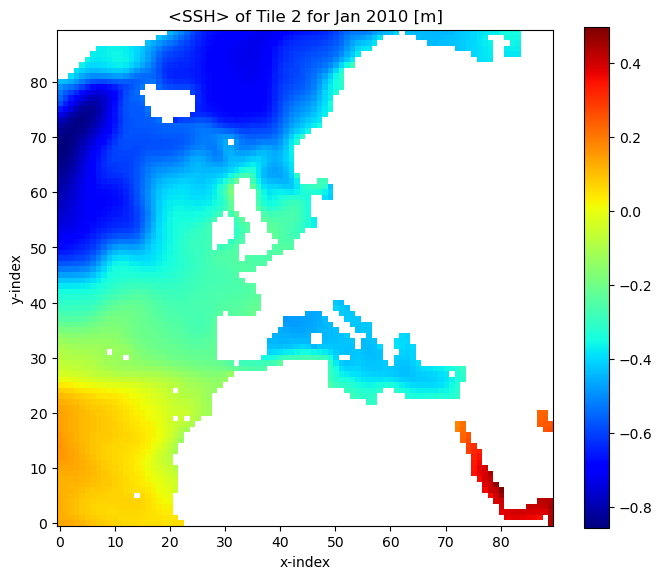

In [27]:
fig=plt.figure(figsize=(8, 6.5))
plt.imshow(ssh_time_0_tile_2, origin='lower',cmap='jet')
plt.colorbar()
plt.title('<SSH> of Tile 2 for Jan 2010 [m]');
plt.xlabel('x-index');
plt.ylabel('y-index');

By eye we see large negative values around x=0, y=70 (i=0, j=70).  Let's confirm: 

In [28]:
# remember the order of the array is [tile, j, i]
ssh_time_0_tile_2[70,0]

-0.84380484

Let's plot *SSH* in this tile from y=0 to y=89 along x=0 (from the subtropical gyre into the subpolar gyre)

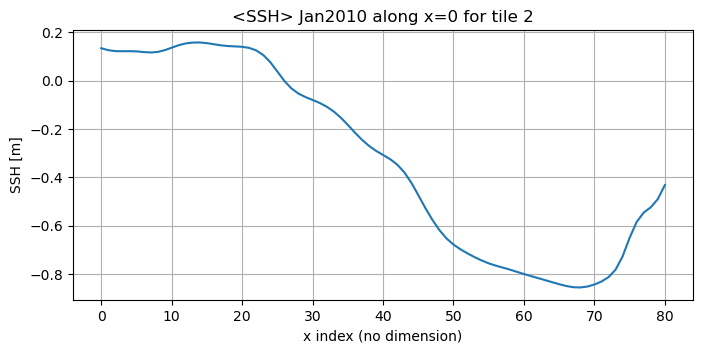

In [29]:
fig=plt.figure(figsize=(8, 3.5))

plt.plot(ssh_time_0_tile_2[:,0])
plt.title('<SSH> Jan2010 along x=0 for tile 2')
plt.ylabel('SSH [m]');plt.xlabel('x index (no dimension)');
plt.grid()

We see that the curve stops at y=80 (rather than y=90), because from around y=80 on we are on Greenland and the array has *nan* values.  

A more interesting plot might be to have the model latitude on the **x** axis instead of x-index:

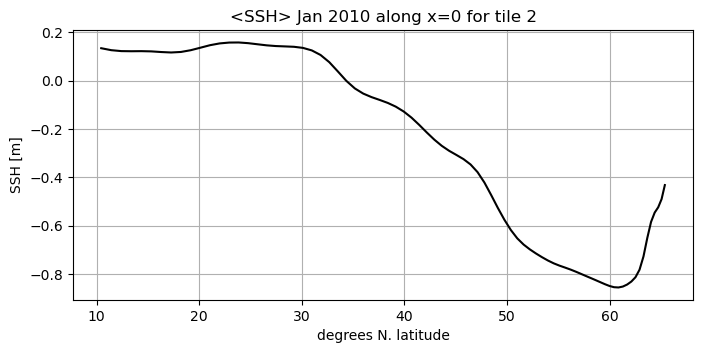

In [30]:
fig=plt.figure(figsize=(8, 3.5))

yc_tile_2 = ecco_ds.YC.values[2,:,:]

plt.plot(yc_tile_2[:,0],ssh_time_0_tile_2[:,0], color='k')
plt.title('<SSH> Jan 2010 along x=0 for tile 2')
plt.ylabel('SSH [m]');plt.xlabel('degrees N. latitude');
plt.grid()

We can always use **[ ]** method to subset our `numpy` arrays.  It is a simple, direct method for accessing our fields.

### Subsetting `DataArrays` using the **[ ]** syntax

An interesting and useful alternative to subsetting `numpy` arrays with the **[ ]** method is to subset `DataArray` instead:

In [31]:
ssh_time_0_tile_2_DA = ecco_ds.SSH[0,2,:,:]
ssh_time_0_tile_2_DA

<xarray.DataArray 'SSH' (j: 90, i: 90)> Size: 32kB
dask.array<getitem, shape=(90, 90), dtype=float32, chunksize=(90, 90), chunktype=numpy.ndarray>
Coordinates:
  * i        (i) int32 360B 0 1 2 3 4 5 6 7 8 9 ... 81 82 83 84 85 86 87 88 89
  * j        (j) int32 360B 0 1 2 3 4 5 6 7 8 9 ... 81 82 83 84 85 86 87 88 89
    tile     int32 4B 2
    XC       (j, i) float32 32kB dask.array<chunksize=(90, 90), meta=np.ndarray>
    YC       (j, i) float32 32kB dask.array<chunksize=(90, 90), meta=np.ndarray>
    time     datetime64[ns] 8B 2010-01-16T12:00:00
Attributes:
    long_name:              Dynamic sea surface height anomaly
    units:                  m
    coverage_content_type:  modelResult
    standard_name:          sea_surface_height_above_geoid
    comment:                Dynamic sea surface height anomaly above the geoi...
    valid_min:              -1.8805772066116333
    valid_max:              1.4207719564437866

The resulting `DataArray` is a subset of the original `DataArray`.  The subset has two fewer dimensions (**tile** and **time** have been eliminated). The horizontal dimensions **j** and **i** are unchanged.

Even though the **tile** and **time** dimensions have been eliminated, the dimensional and non-dimensional coordinates associated with **time** and **tile** remain.  In fact, these coordinates *tell us when in time and which tile our subset comes from*:

```
Coordinates:
  * j        (j) int64 0 1 2 3 4 5 6 7 8 9 10 ... 80 81 82 83 84 85 86 87 88 89
  * i        (i) int64 0 1 2 3 4 5 6 7 8 9 10 ... 80 81 82 83 84 85 86 87 88 89
    tile     int64 2
    XC       (j, i) float32 -37.5 -36.5 -35.5 ... 50.968143 51.44421 51.837925
    YC       (j, i) float32 10.458642 10.458642 10.458642 ... 67.53387 67.47211
    Depth    (j, i) float32 4658.681 4820.5703 5014.177 ... 0.0 0.0 0.0
    rA       (j, i) float32 11896091000.0 11896091000.0 ... 212633870.0
    iter     int32 158532
    time     datetime64[ns] 2010-01-16T12:00:00
```

Notice that the *tile* coordinate is 2 and the *time* coordinate is Jan 16, 2010, the middle of Jan.

As a `DataArray` we can take full advantage of the built-in plotting functionality of ``xarray``.  This functionality, which we've seen a few times, automatically labels the figure (although sometimes the labels can be a little odd).

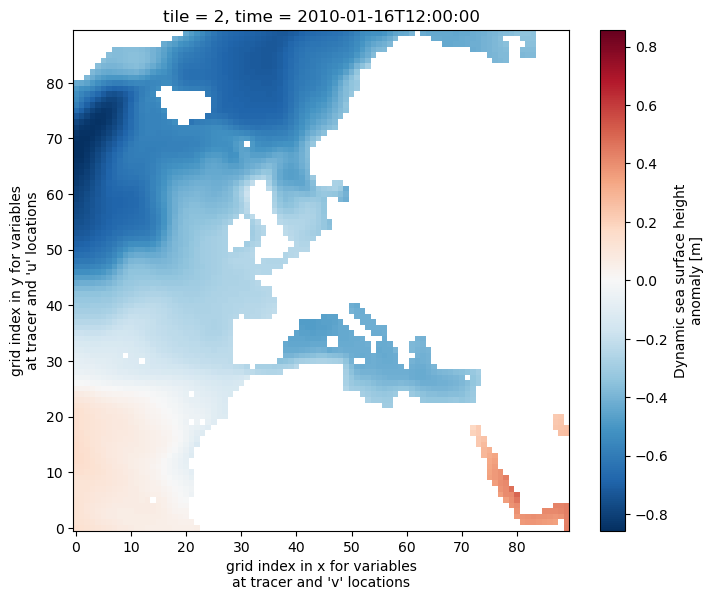

In [32]:
fig=plt.figure(figsize=(8, 6.5))
ssh_time_0_tile_2_DA.plot()

### Subsetting `DataArrays` using the **.sel( )** syntax

Another useful method for subsetting `DataArrays` is the **.sel( )** syntax.  The **.sel( )** syntax takes advantage of the fact that coordinates are **labels**.  We **sel**ect subsets of the `DataArray` by providing a subset of coordinate labels.

Let's select tile 2 and time 2010-01-16:

In [33]:
ssh_time_0_tile_2_sel = ecco_ds.SSH.sel(time='2010-01-16', tile=2)
ssh_time_0_tile_2_sel

<xarray.DataArray 'SSH' (time: 1, j: 90, i: 90)> Size: 32kB
dask.array<getitem, shape=(1, 90, 90), dtype=float32, chunksize=(1, 90, 90), chunktype=numpy.ndarray>
Coordinates:
  * i        (i) int32 360B 0 1 2 3 4 5 6 7 8 9 ... 81 82 83 84 85 86 87 88 89
  * j        (j) int32 360B 0 1 2 3 4 5 6 7 8 9 ... 81 82 83 84 85 86 87 88 89
    tile     int32 4B 2
    XC       (j, i) float32 32kB dask.array<chunksize=(90, 90), meta=np.ndarray>
    YC       (j, i) float32 32kB dask.array<chunksize=(90, 90), meta=np.ndarray>
  * time     (time) datetime64[ns] 8B 2010-01-16T12:00:00
Attributes:
    long_name:              Dynamic sea surface height anomaly
    units:                  m
    coverage_content_type:  modelResult
    standard_name:          sea_surface_height_above_geoid
    comment:                Dynamic sea surface height anomaly above the geoi...
    valid_min:              -1.8805772066116333
    valid_max:              1.4207719564437866

The only difference here is that the resulting array has 'time' as a singleton dimension (dimension of length 1).  I don't know why.  Just use the ``squeeze`` command to squeeze it out.

In [34]:
ssh_time_0_tile_2_sel = ssh_time_0_tile_2_sel.squeeze()
ssh_time_0_tile_2_sel

<xarray.DataArray 'SSH' (j: 90, i: 90)> Size: 32kB
dask.array<getitem, shape=(90, 90), dtype=float32, chunksize=(90, 90), chunktype=numpy.ndarray>
Coordinates:
  * i        (i) int32 360B 0 1 2 3 4 5 6 7 8 9 ... 81 82 83 84 85 86 87 88 89
  * j        (j) int32 360B 0 1 2 3 4 5 6 7 8 9 ... 81 82 83 84 85 86 87 88 89
    tile     int32 4B 2
    XC       (j, i) float32 32kB dask.array<chunksize=(90, 90), meta=np.ndarray>
    YC       (j, i) float32 32kB dask.array<chunksize=(90, 90), meta=np.ndarray>
    time     datetime64[ns] 8B 2010-01-16T12:00:00
Attributes:
    long_name:              Dynamic sea surface height anomaly
    units:                  m
    coverage_content_type:  modelResult
    standard_name:          sea_surface_height_above_geoid
    comment:                Dynamic sea surface height anomaly above the geoi...
    valid_min:              -1.8805772066116333
    valid_max:              1.4207719564437866

### Subsetting `DataArrays` using the **.isel( )** syntax

The last subsetting method is **.isel( )** syntax.  **.isel( )** uses the numerical **index** of coordinates instead of their label.  Subsets are extracted by providing a set of coordinate indices.

Because **sel()** uses the coordinate values as LABELS and **isel()** uses the index of the coordinates, they cannot  necessarily be used interchangably.  It is only because in ECCOv4 NetCDF files we gave the NAMES of some coordinates the same names as the INDICES of those coordinates that you can use:
* **sel(tile=2)** gives you the tile with the index NAME 2
* **isel(tile=2)** gives you the tile at index 2

Let's pull out a slice of *SSH* for tile at INDEX POSITION 2 and *time* at INDEX POSITION 0

In [35]:
ssh_time_0_tile_2_isel = ecco_ds.SSH.isel(tile=2, time=0)
ssh_time_0_tile_2_isel

<xarray.DataArray 'SSH' (j: 90, i: 90)> Size: 32kB
dask.array<getitem, shape=(90, 90), dtype=float32, chunksize=(90, 90), chunktype=numpy.ndarray>
Coordinates:
  * i        (i) int32 360B 0 1 2 3 4 5 6 7 8 9 ... 81 82 83 84 85 86 87 88 89
  * j        (j) int32 360B 0 1 2 3 4 5 6 7 8 9 ... 81 82 83 84 85 86 87 88 89
    tile     int32 4B 2
    XC       (j, i) float32 32kB dask.array<chunksize=(90, 90), meta=np.ndarray>
    YC       (j, i) float32 32kB dask.array<chunksize=(90, 90), meta=np.ndarray>
    time     datetime64[ns] 8B 2010-01-16T12:00:00
Attributes:
    long_name:              Dynamic sea surface height anomaly
    units:                  m
    coverage_content_type:  modelResult
    standard_name:          sea_surface_height_above_geoid
    comment:                Dynamic sea surface height anomaly above the geoi...
    valid_min:              -1.8805772066116333
    valid_max:              1.4207719564437866

### More examples of subsetting using the **[ ]**, **.sel( )** and **.isel( )** syntaxes

In the examples above we only subsetted month (Jan 2010) and a single tile (tile 2).  More complex subsetting is possible.  Here are some three examples that yield equivalent, more complex, subsets:

  > **Note:** Python array indexing goes up to but not including the final number in a range.  Because array indexing starts from 0, array index 41 corresponds to the 42nd element.

In [36]:
ssh_sub_bracket  = ecco_ds.SSH[3, 5, 31:41, 5:22]
ssh_sub_isel     = ecco_ds.SSH.isel(tile=5, time=3, i=range(5,22), j=range(31,41))
ssh_sub_sel      = ecco_ds.SSH.sel(tile=5, time='2010-03-16', i=range(5,22), j=range(31,41)).squeeze()

print('\nssh_sub_bracket')
print('--size %s ' % str(ssh_sub_bracket.shape))
print('--time %s ' % ssh_sub_bracket.time.values)
print('--tile %s ' % ssh_sub_bracket.tile.values)

print('\nssh_sub_isel')
print('--size %s ' % str(ssh_sub_isel.shape))
print('--time %s ' % ssh_sub_isel.time.values)
print('--tile %s ' % ssh_sub_isel.tile.values)


print('\nssh_sub_isel')
print('--size %s ' % str(ssh_sub_sel.shape))
print('--time %s ' % ssh_sub_sel.time.values)
print('--tile %s ' % ssh_sub_sel.tile.values)



ssh_sub_bracket
--size (10, 17) 
--time 2010-04-16T00:00:00.000000000 
--tile 5 

ssh_sub_isel
--size (10, 17) 
--time 2010-04-16T00:00:00.000000000 
--tile 5 

ssh_sub_isel
--size (10, 17) 
--time 2010-03-16T12:00:00.000000000 
--tile 5 


### Subsetting `Datasets` using the **.sel( )**, and **.isel( )** syntaxes

Amazingly, we can use the **.sel** and **.isel** methods to simultaneously subset multiple `DataArrays` stored within an single `Dataset`.  Let's make an interesting `Dataset` to subset and then test out the **.sel( )** and **.isel( )** subsetting methods.

Let's work on tile 1, time = 5 (June, 2010)

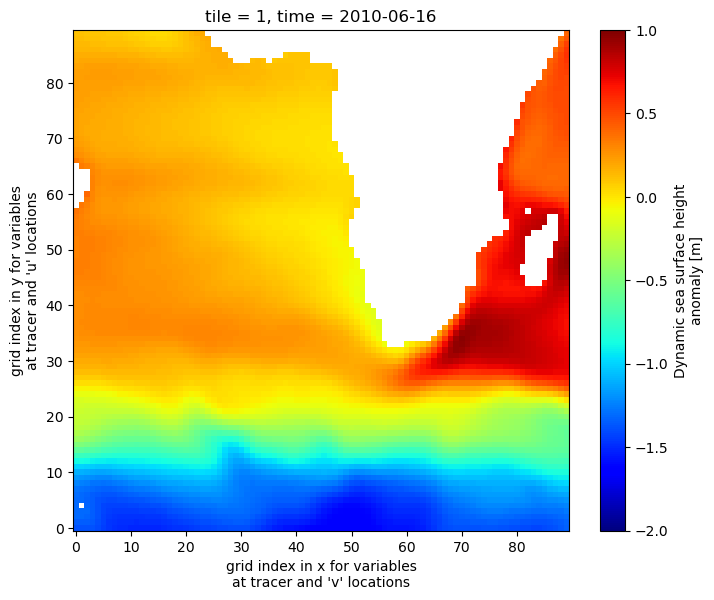

In [37]:
fig=plt.figure(figsize=(8, 6.5))

ecco_ds.SSH.isel(tile=1,time=5).plot(cmap='jet',vmin=-2, vmax=1)

Subset tile 1, j = 50 (a single row through the array), and time = 5 (June 2010)

In [38]:
output_tile1_time06_j50= ecco_ds.isel(tile=1, time=5, j=50).load()
output_tile1_time06_j50.data_vars

Data variables:
    CS        (i) float32 360B 1.0 1.0 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0 1.0 1.0
    SN        (i) float32 360B -3.751e-15 1.875e-15 ... -1.875e-15 3.751e-15
    rA        (i) float32 360B 1.108e+10 1.108e+10 ... 1.108e+10 1.108e+10
    dxG       (j_g, i) float32 32kB 6.054e+04 6.054e+04 ... 1.098e+05 1.098e+05
    dyG       (i_g) float32 360B 1.055e+05 1.055e+05 ... 1.055e+05 1.055e+05
    Depth     (i) float32 360B 3.343e+03 3.809e+03 ... 4.404e+03 4.833e+03
    rAz       (j_g, i_g) float32 32kB 3.584e+09 3.584e+09 ... 1.179e+10
    dxC       (i_g) float32 360B 1.05e+05 1.05e+05 ... 1.05e+05 1.05e+05
    dyC       (j_g, i) float32 32kB 5.92e+04 5.92e+04 ... 1.074e+05 1.074e+05
    rAw       (i_g) float32 360B 1.108e+10 1.108e+10 ... 1.108e+10 1.108e+10
    rAs       (j_g, i) float32 32kB 3.584e+09 3.584e+09 ... 1.179e+10 1.179e+10
    drC       (k_p1) float32 204B 5.0 10.0 10.0 10.0 ... 399.0 422.0 445.0 228.2
    drF       (k) float32 200B 10.0 10.0 10.0 10.0 ... 387.5

All variables that had **tile, time**, or **j** coordinates have been subset while other variables (including those with the offset **j_g** coordinates) are unchanged.  Let's plot the seafloor depth and sea surface height from west to east along j=50, (see plot at Line 16) which extends across the S. Atlantic, across Africa to Madagascar, and finally into to W. Indian Ocean.

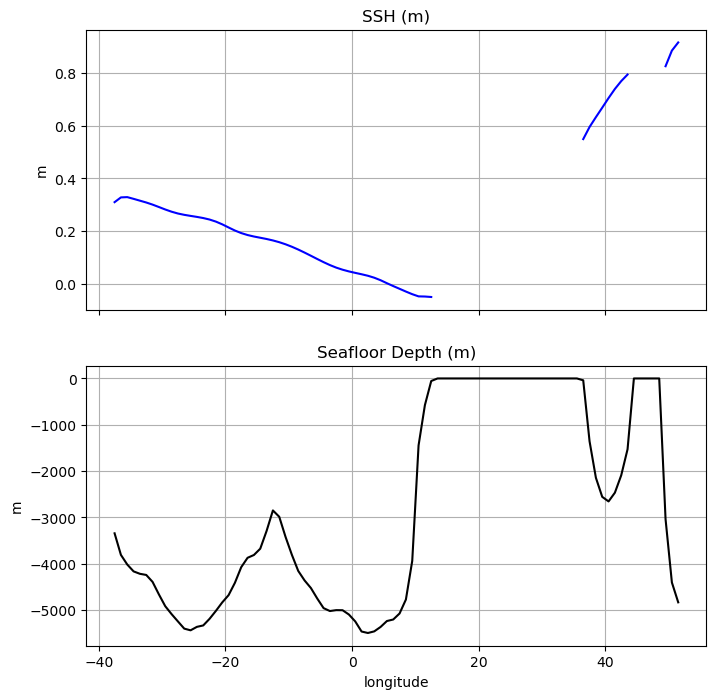

In [39]:
f, axarr = plt.subplots(2, sharex=True,figsize=(8, 8))
(ax1, ax2) = axarr
ax1.plot(output_tile1_time06_j50.XC, output_tile1_time06_j50.SSH,color='b')
ax1.set_ylabel('m')
ax1.set_title('SSH (m)')
ax1.grid()

ax2.plot(output_tile1_time06_j50.XC, -output_tile1_time06_j50.Depth,color='k')
ax2.set_xlabel('longitude')
ax2.set_ylabel('m')
ax2.set_title('Seafloor Depth (m)')
ax2.grid()

### Subsetting using the **where( )** syntax

The **where( )** method is quite different than other subsetting methods because  subsetting is done by masking out values with *nans* that do not meet some specified criteria.  

For more infomation about **where( )** see http://xarray.pydata.org/en/stable/indexing.html#masking-with-where

Let's demonstrate **where** by masking out all SSH values that do not fall within a box defined between 20S to 60N and 50W to 10E.

First, we'll extract the ``SSH`` `DataArray`

In [40]:
ssh_da=ecco_ds.SSH

Create a matrix that is `True` where latitude is between 20S and 60N and `False` otherwise.

In [41]:
lat_bounds = np.logical_and(ssh_da.YC  > -20, ssh_da.YC < 60)

Create a matrix that is `True` where longitude is between 50W and 10E and `False` otherwise.

In [42]:
lon_bounds = np.logical_and(ssh_da.XC  > -50, ssh_da.XC < 10)

Combine the ``lat_bounds`` and ``lon_bounds`` logical matrices:

In [43]:
lat_lon_bounds = np.logical_and(lat_bounds, lon_bounds)

Finally, use **where** to mask out all SSH values that do not fall within our  ``lat_lon_bounds``

In [44]:
ssh_da_subset_space = ssh_da.where(lat_lon_bounds, np.nan)

To visualize the SSH in our box we'll use one of our ECCO v4 custom plotting routines (which will be the subject of another tutorial).  

Notice the use of **.sel( )** to subset a single time slice (time=1) for plotting.

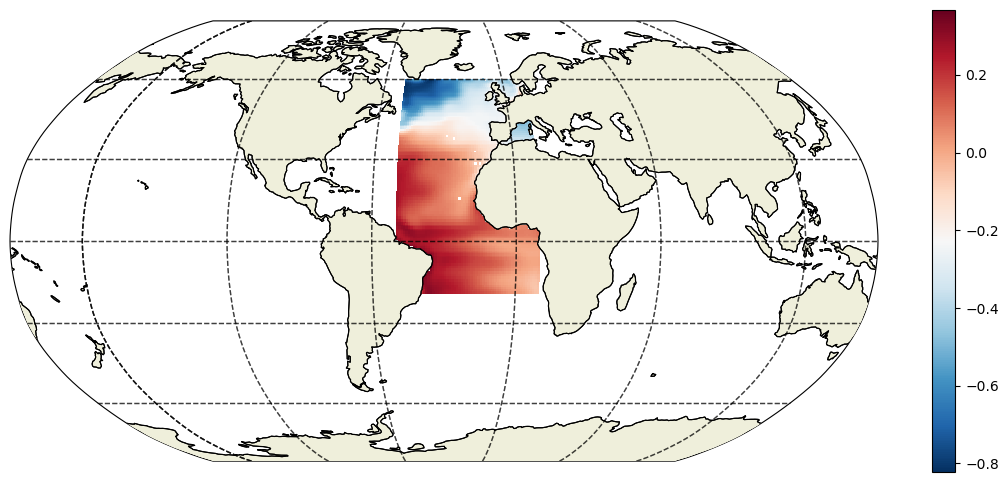

In [45]:
fig=plt.figure(figsize=(14, 6))

ecco.plot_proj_to_latlon_grid(ecco_ds.XC, ecco_ds.YC, \
                              ssh_da_subset_space.isel(time=6),\
                              dx=.5, dy=.5,user_lon_0 = -30,\
                              show_colorbar=True);

## Conclusion

You now know several different methods for accessing and subsetting fields in `Dataset` and `DataArray` objects.    

To learn a more about indexing/subsetting methods please refer to the `xarray` manual for indexing methods, http://xarray.pydata.org/en/stable/indexing.html.  